In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from google.colab import files
files.upload()

{}

In [2]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d mohammedarfathr/smartwatch-health-data-uncleaned -p /content


Dataset URL: https://www.kaggle.com/datasets/mohammedarfathr/smartwatch-health-data-uncleaned
License(s): apache-2.0
  0% 0.00/382k [00:00<?, ?B/s]
100% 382k/382k [00:00<00:00, 126MB/s]


In [274]:
dforg = pd.read_csv('/content/smartwatch-health-data-uncleaned.zip')

In [275]:
dforg

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


In [300]:
df=dforg.sample(n=1000, random_state=42)

working wih data (includes standardization of categorical values)

In [301]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6252 to 7713
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 979 non-null    float64
 1   Heart Rate (BPM)        967 non-null    float64
 2   Blood Oxygen Level (%)  968 non-null    float64
 3   Step Count              991 non-null    float64
 4   Sleep Duration (hours)  983 non-null    object 
 5   Activity Level          985 non-null    object 
 6   Stress Level            979 non-null    object 
dtypes: float64(4), object(3)
memory usage: 62.5+ KB
None
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)   Step Count  \
6252   3594.0        109.693659               99.160972  1700.981734   
4684   2502.0         52.271942                     NaN  7817.080785   
1731   2287.0         82.641735               94.805903  3262.359444   
4742   3043.0         78.114984               95.229480  1109.905969   
4

In [302]:
df.drop(columns=['User ID'], inplace=True)# this column is not needed for anslysis of data

In [303]:
# Identifying object-type columns except 'Activity Level'
object_cols = df.select_dtypes(include=['object']).columns.difference(["Activity Level"])

# Converting remaining object columns to float
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verifyinh conversion
print(df.dtypes)


Heart Rate (BPM)          float64
Blood Oxygen Level (%)    float64
Step Count                float64
Sleep Duration (hours)    float64
Activity Level             object
Stress Level              float64
dtype: object


In [304]:
df

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
6252,109.693659,99.160972,1700.981734,7.529728,Highly_Active,8.0
4684,52.271942,NaN,7817.080785,3.720480,Sedentary,4.0
1731,82.641735,94.805903,3262.359444,4.877511,Actve,8.0
4742,78.114984,95.229480,1109.905969,5.927326,Highly_Active,3.0
4521,246.094144,100.000000,5614.112857,6.304732,Active,2.0
...,...,...,...,...,...,...
3921,78.093685,95.613836,7576.889661,6.966371,Highly Active,2.0
6685,61.766091,98.018253,17063.188066,5.172615,Seddentary,9.0
3194,81.961086,96.418215,6894.452939,6.696409,Highly Active,7.0
1941,42.658474,98.663192,3815.501686,NaN,Highly Active,2.0


In [305]:
print(df.isnull().sum())

Heart Rate (BPM)          33
Blood Oxygen Level (%)    32
Step Count                 9
Sleep Duration (hours)    46
Activity Level            15
Stress Level              23
dtype: int64


In [306]:
print(df["Activity Level"].unique())


['Highly_Active' 'Sedentary' 'Actve' 'Active' 'Highly Active' 'Seddentary'
 nan]


In [307]:
# Defining correct mappings
corrections = {
    "Actve": "Active",
    "Highly Active": "Highly_Active",
    "Seddentary": "Sedentary"
}
df["Activity Level"] = df["Activity Level"].replace(corrections)


In [308]:
df["Activity Level"].fillna(df["Activity Level"].mode()[0], inplace=True)


<ipython-input-308-87a4fd65a9b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Activity Level"].fillna(df["Activity Level"].mode()[0], inplace=True)


In [309]:
df.sample(10)

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
36,40.000000,100.000000,8043.061917,7.791686,Active,5.0
993,58.285446,98.630536,2489.913997,7.905588,Highly_Active,2.0
9134,91.584714,100.000000,1387.019275,6.823527,Sedentary,4.0
3410,78.022418,96.677066,9792.345742,7.721795,Highly_Active,6.0
263,81.383052,98.414149,12618.046919,5.258330,Active,8.0
8629,48.921507,95.967117,4378.878220,9.038031,Sedentary,3.0
8191,47.637538,98.646664,11986.526108,6.474975,Highly_Active,6.0
2522,59.120370,96.925080,35205.735516,7.081197,Sedentary,4.0
1599,77.577067,100.000000,8388.746167,8.982503,Highly_Active,1.0
7444,80.359284,96.410491,1102.399224,6.829836,Active,3.0


In [310]:
from pandas.api.types import CategoricalDtype
activity_order = ["Sedentary", "Active", "Highly_Active"]
df["Activity Level"] = df["Activity Level"].astype(CategoricalDtype(categories=activity_order, ordered=True))
df["Activity Level"] = df["Activity Level"].cat.codes
print(df["Activity Level"].unique())


[2 0 1]


In [313]:
# Converting specified columns to object (string) type
df['Activity Level'] = df['Activity Level'].astype(str)
df['Stress Level'] = df['Stress Level'].astype(str)
print(df.dtypes)


Heart Rate (BPM)          float64
Blood Oxygen Level (%)    float64
Step Count                float64
Sleep Duration (hours)    float64
Activity Level             object
Stress Level               object
dtype: object


dealing with missing values

In [312]:
df.isnull().sum()

,0
Heart Rate (BPM),33
Blood Oxygen Level (%),32
Step Count,9
Sleep Duration (hours),46
Activity Level,0
Stress Level,23


In [314]:
# we fill missing values for numerical columns with their mean
df['Heart Rate (BPM)'].fillna(df['Heart Rate (BPM)'].mean(), inplace=True)
df['Blood Oxygen Level (%)'].fillna(df['Blood Oxygen Level (%)'].mean(), inplace=True)
df['Step Count'].fillna(df['Step Count'].mean(), inplace=True)
df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].mean(), inplace=True)

# we fill missing values for categorical columns with their mode
df['Activity Level'].fillna(df['Activity Level'].mode()[0], inplace=True)
df['Stress Level'].fillna(df['Stress Level'].mode()[0], inplace=True)

# checking if missing values are removed
print(df.isnull().sum())


Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64


<ipython-input-314-4789f694751b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Heart Rate (BPM)'].fillna(df['Heart Rate (BPM)'].mean(), inplace=True)
<ipython-input-314-4789f694751b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

duplicated values

In [316]:
df.duplicated().sum()


0

In [317]:
# if there were duplicate rows we could use the below code
# df.drop_duplicates(inplace=True)

outliers

In [318]:
def analyze_outliers(df, threshold=1.5):
    for col in df.select_dtypes(include=np.number):  # Only numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        # Plot individual boxplot
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=df[col], palette="Set2")
        plt.title(f"Outliers in {col}")
        plt.show()


<ipython-input-318-c1a31a5786b3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


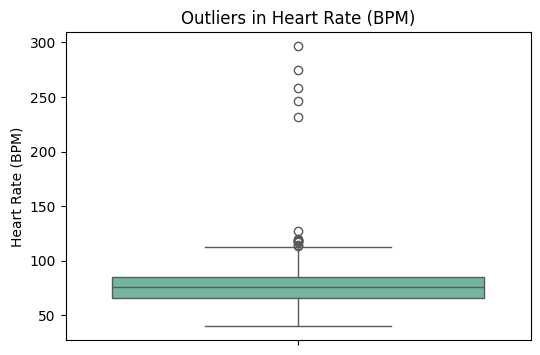

<ipython-input-318-c1a31a5786b3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


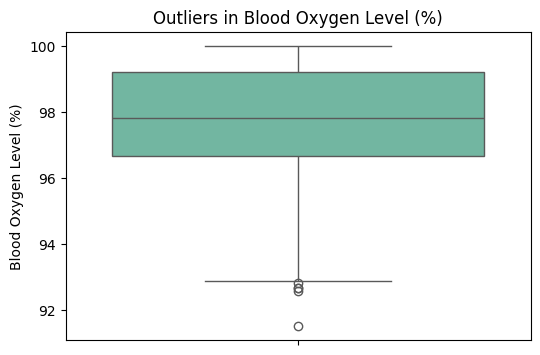

<ipython-input-318-c1a31a5786b3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


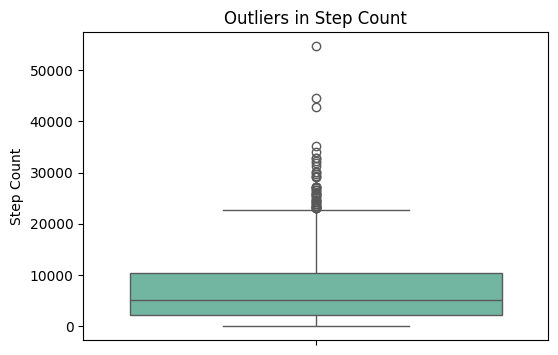

<ipython-input-318-c1a31a5786b3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


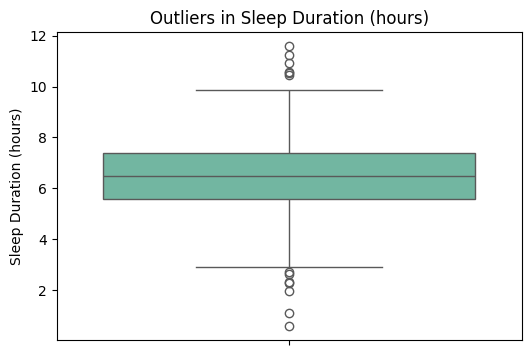

In [319]:
analyze_outliers(df)


In [320]:
import pandas as pd
import numpy as np
for col in df.select_dtypes(include=[np.number]):  # Loop through only numerical columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replacing outliers with nearest bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers replaced with nearest bound successfully.")


Outliers replaced with nearest bound successfully.


<ipython-input-318-c1a31a5786b3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


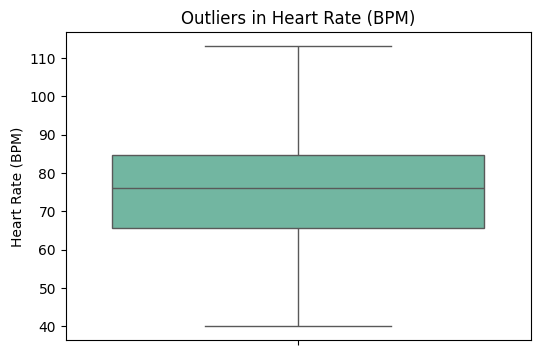

<ipython-input-318-c1a31a5786b3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


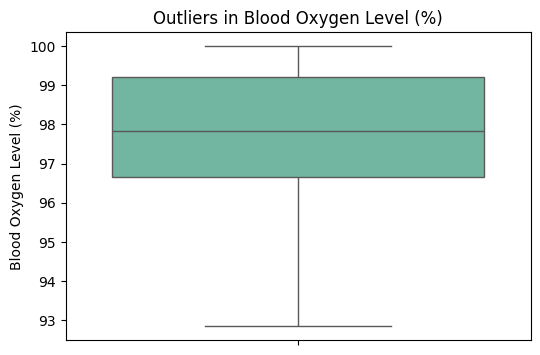

<ipython-input-318-c1a31a5786b3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


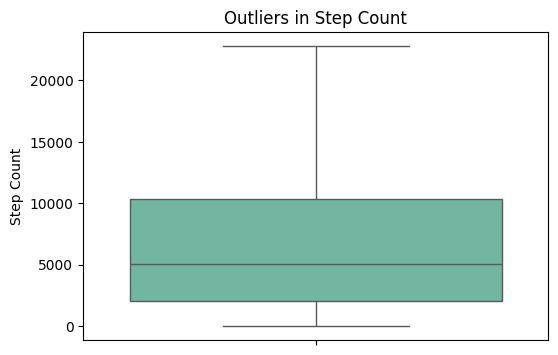

<ipython-input-318-c1a31a5786b3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


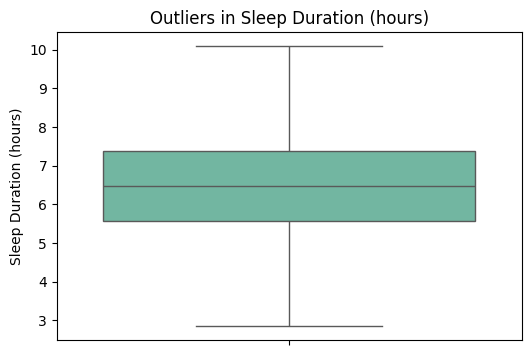

In [321]:
analyze_outliers(df)


summary statistics

In [322]:
df.describe()


,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,75.229195,97.756326,7018.587849,6.475178
std,14.960355,1.736667,6127.528938,1.437665
min,40.000000,92.848194,6.663384,2.851263
25%,65.670811,96.661218,2090.783505,5.565851
50%,76.017209,97.828864,5082.926251,6.473661
75%,84.654939,99.203234,10369.512910,7.375576
max,113.131133,100.000000,22787.607016,10.090165


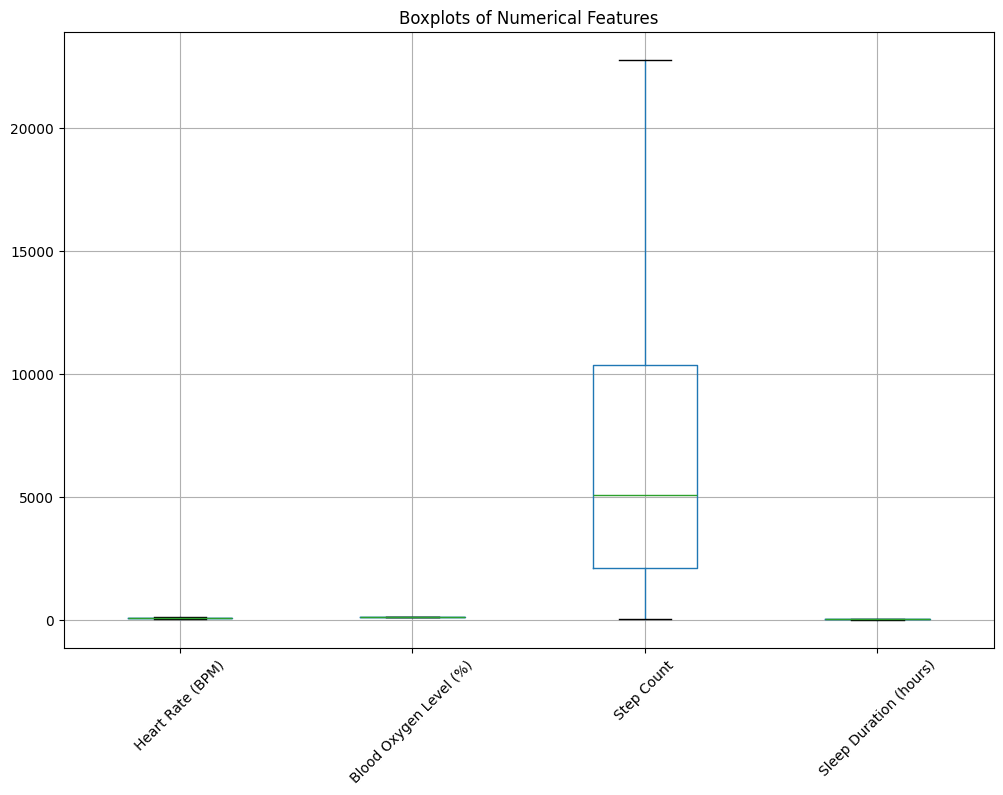

In [246]:
import seaborn as sns

plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()


histograms

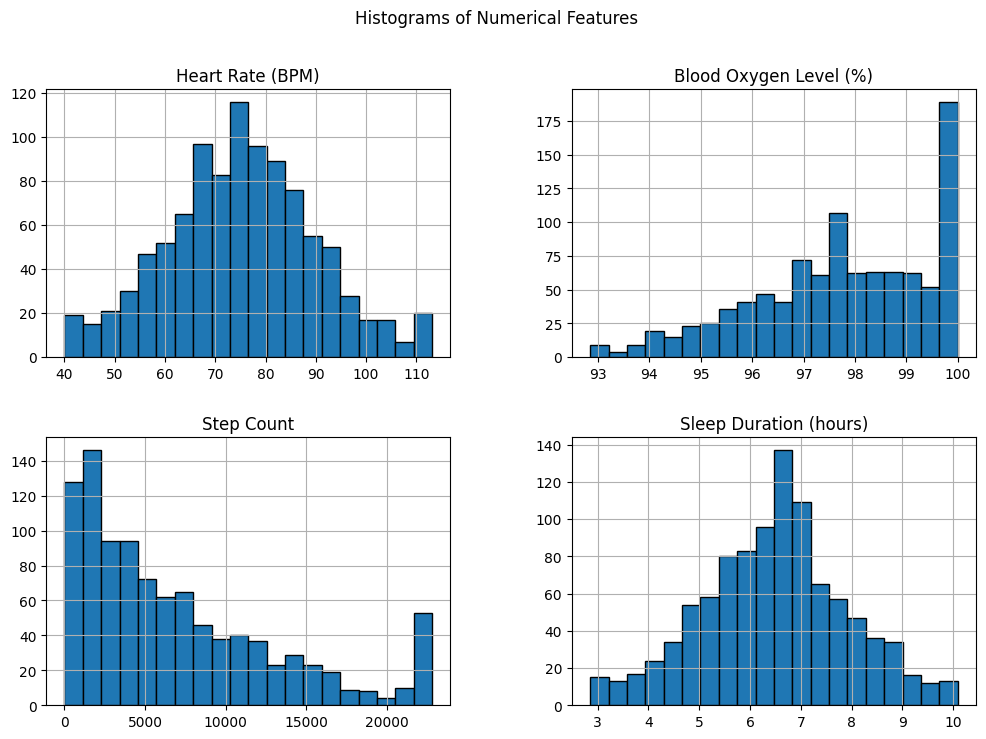

In [247]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()


categorical variables

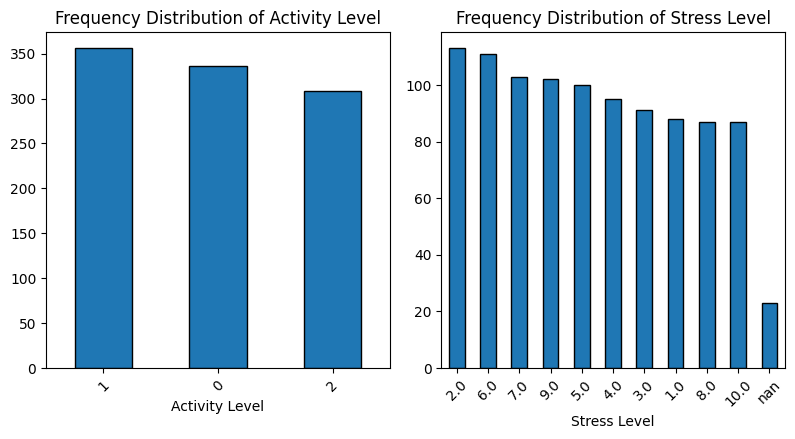

In [248]:
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot bar charts for categorical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust rows/columns based on the number of categories
    df[col].value_counts().plot(kind='bar', edgecolor="black")
    plt.title(f"Frequency Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


correlation matrix

In [249]:
df.corr()


,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
Heart Rate (BPM),1.000000,-0.042221,-0.025855,0.001455,0.036351,0.067182
Blood Oxygen Level (%),-0.042221,1.000000,0.062423,0.037240,0.019674,-0.028648
Step Count,-0.025855,0.062423,1.000000,0.019377,0.016640,-0.016289
Sleep Duration (hours),0.001455,0.037240,0.019377,1.000000,-0.019402,-0.019177
Activity Level,0.036351,0.019674,0.016640,-0.019402,1.000000,-0.043827
Stress Level,0.067182,-0.028648,-0.016289,-0.019177,-0.043827,1.000000


scatter plot

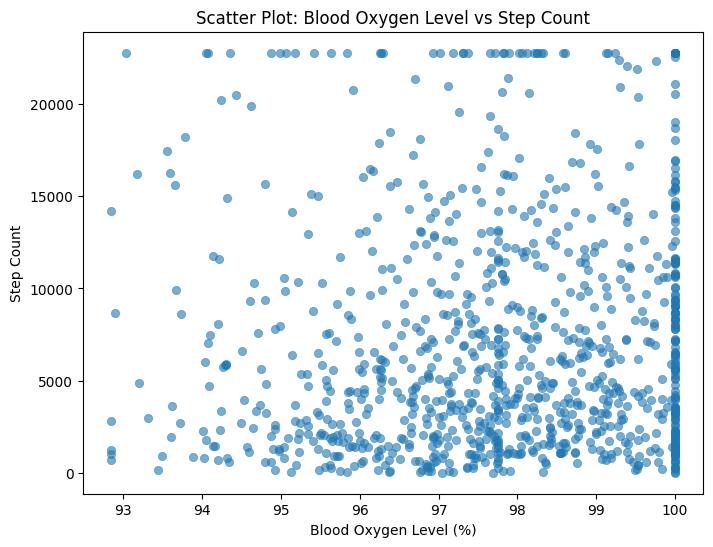

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Blood Oxygen Level (%)", y="Step Count", alpha=0.6, edgecolor=None)

# Titles and labels
plt.title("Scatter Plot: Blood Oxygen Level vs Step Count")
plt.xlabel("Blood Oxygen Level (%)")
plt.ylabel("Step Count")
plt.show()


pairplots (including all other scatterplots that were not plotted above)

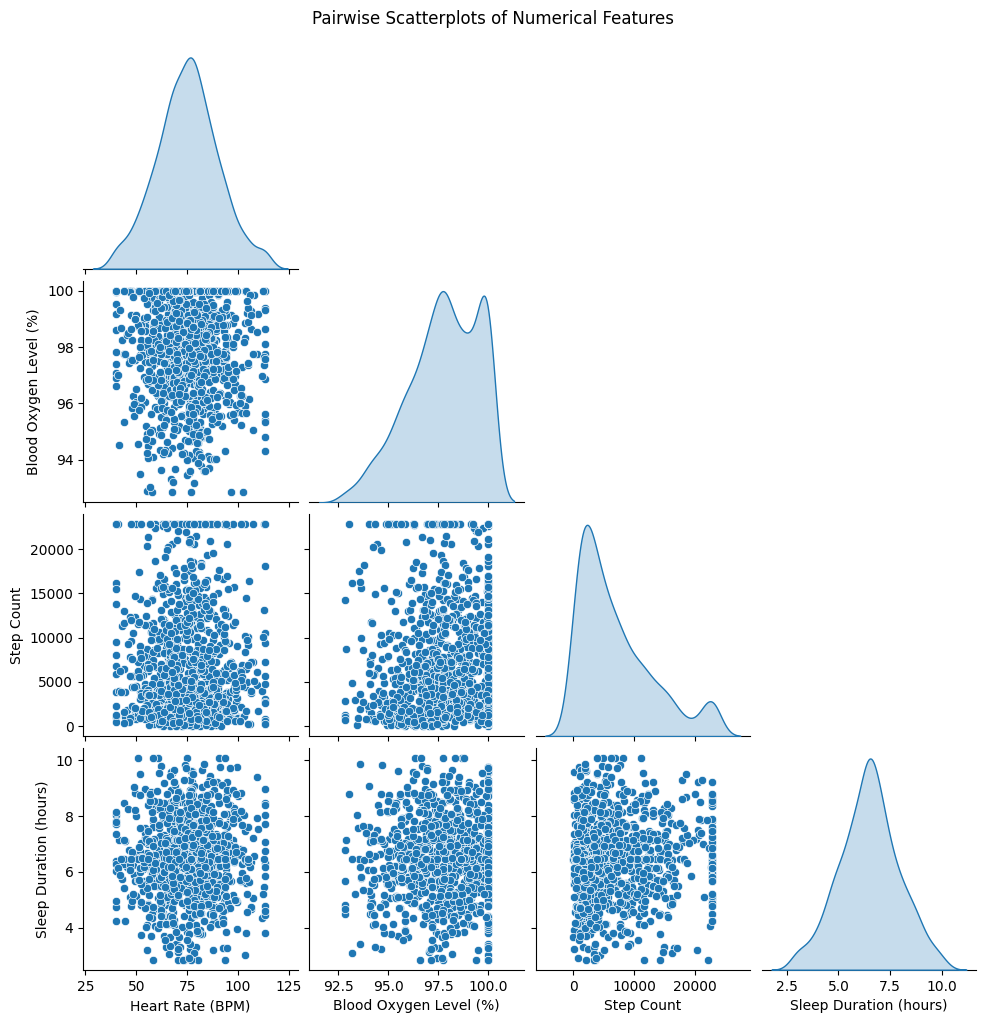

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatterplots for all numerical variables
sns.pairplot(df, diag_kind='kde', corner=True)  # `corner=True` removes duplicate plots
plt.suptitle("Pairwise Scatterplots of Numerical Features", y=1.02)
plt.show()


barplots, violin plots, box plots

<ipython-input-251-e85d3a00f8b3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=df, ci=None)


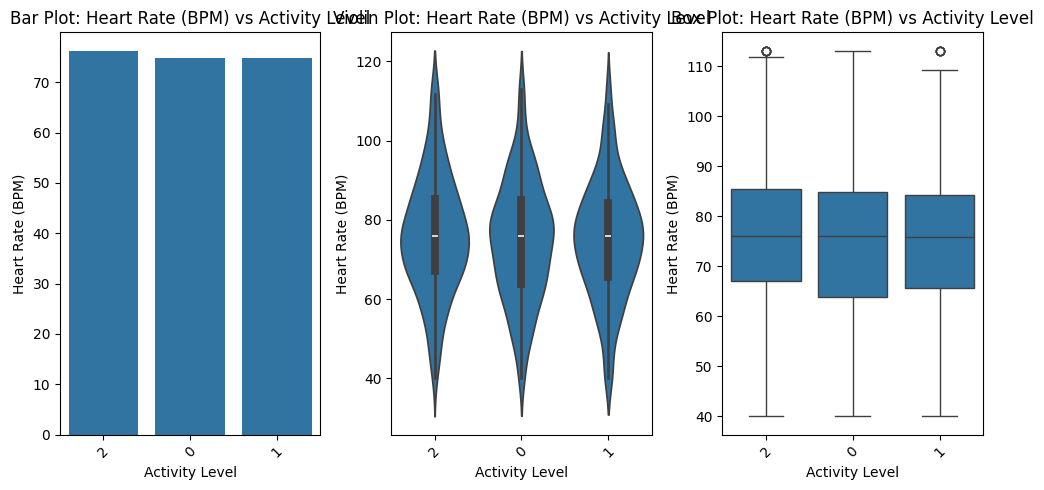

<ipython-input-251-e85d3a00f8b3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=df, ci=None)


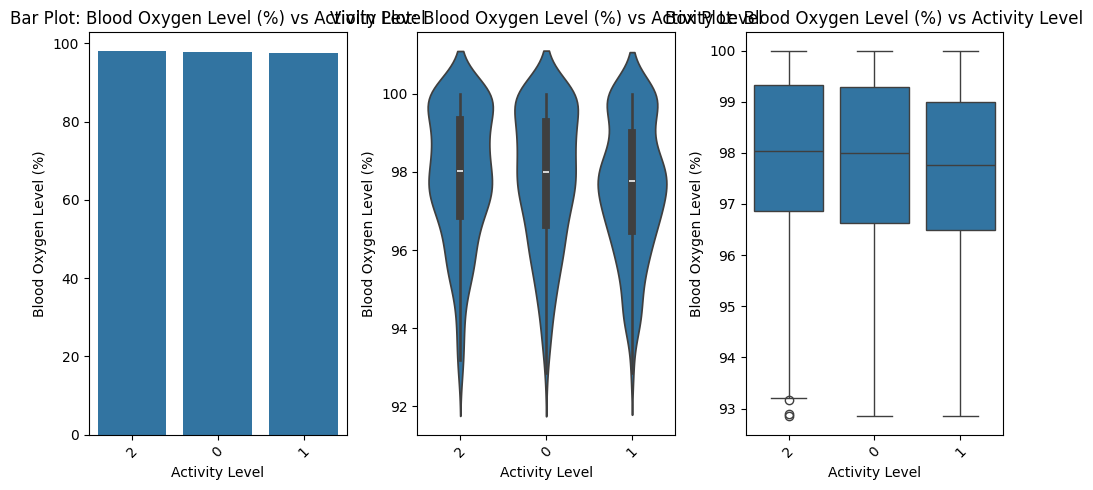

<ipython-input-251-e85d3a00f8b3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=df, ci=None)


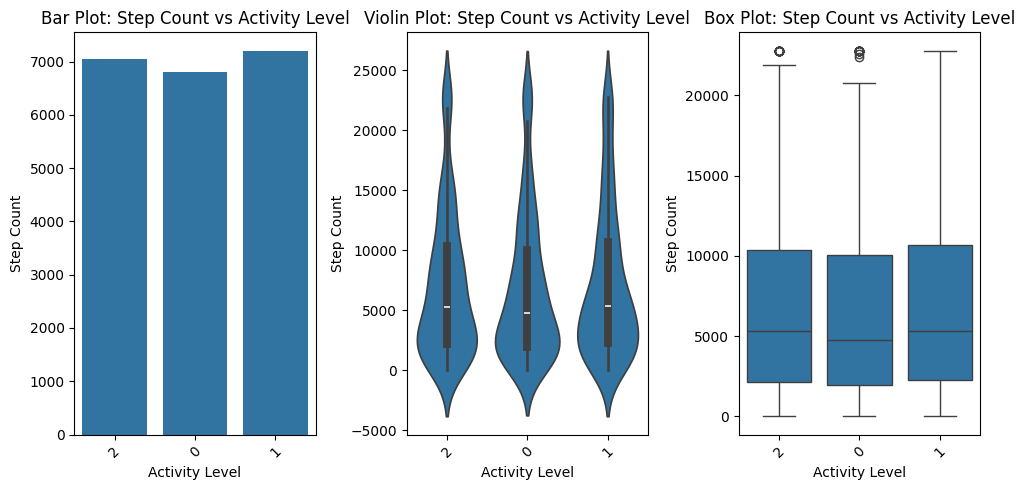

<ipython-input-251-e85d3a00f8b3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=df, ci=None)


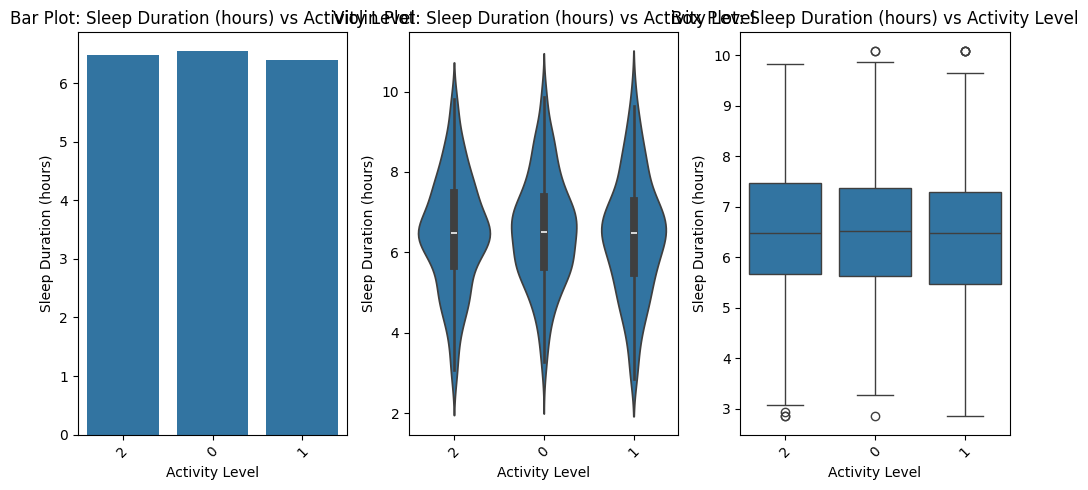

<ipython-input-251-e85d3a00f8b3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=df, ci=None)


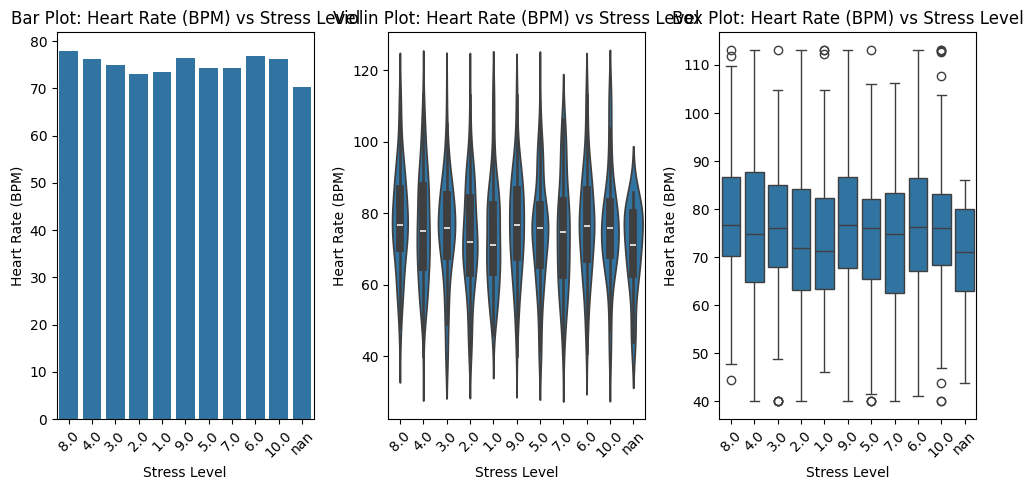

<ipython-input-251-e85d3a00f8b3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=df, ci=None)


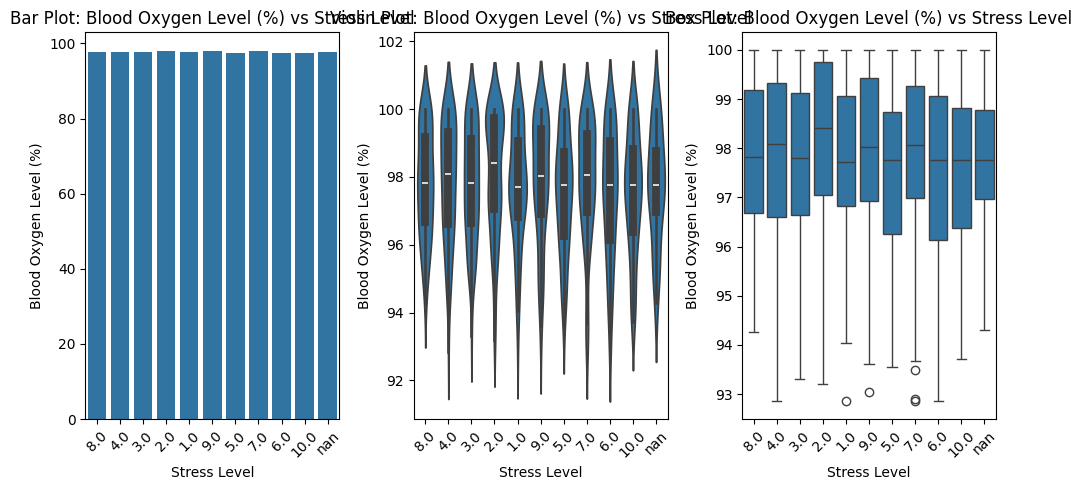

<ipython-input-251-e85d3a00f8b3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=df, ci=None)


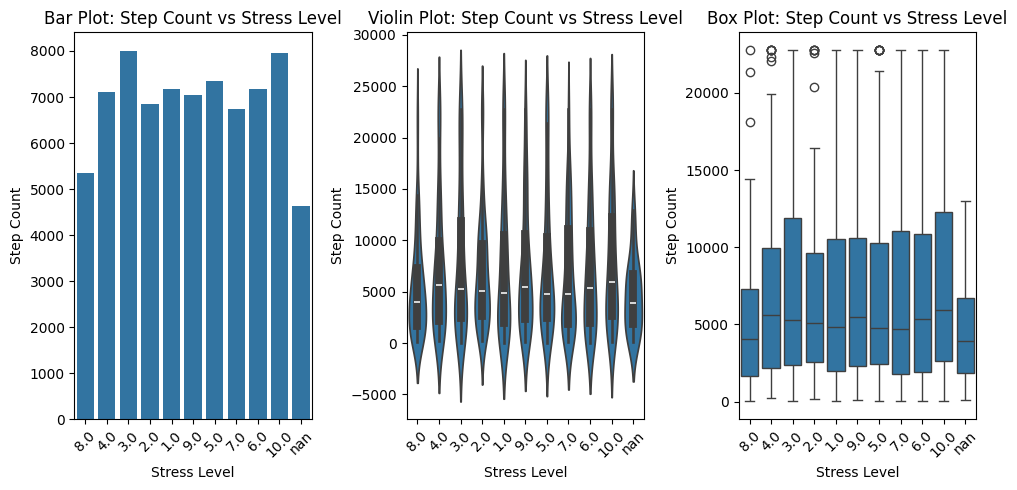

<ipython-input-251-e85d3a00f8b3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=df, ci=None)


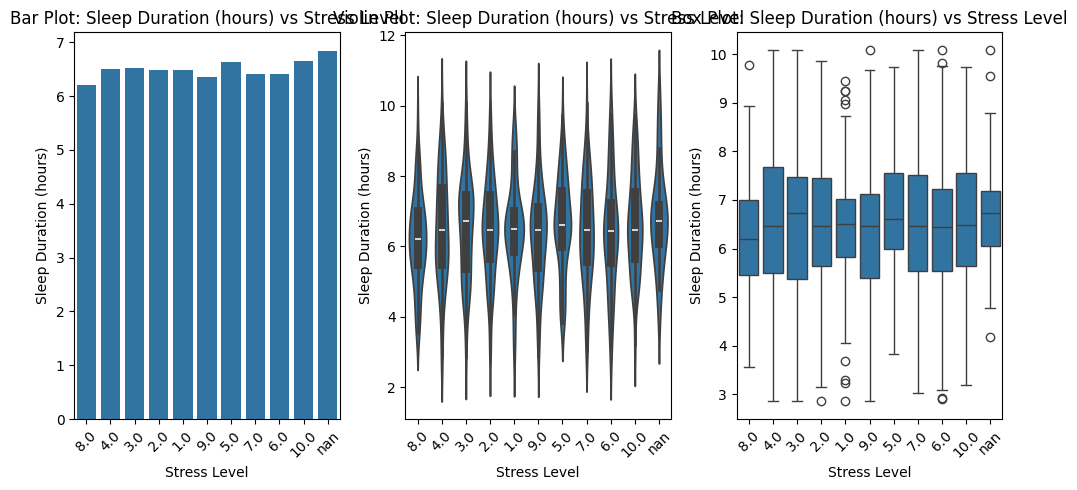

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Iterate over categorical columns and plot comparisons
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 5))

        # Bar Plot
        plt.subplot(1, 3, 1)
        sns.barplot(x=cat_col, y=num_col, data=df, ci=None)
        plt.xticks(rotation=45)
        plt.title(f"Bar Plot: {num_col} vs {cat_col}")

        # Violin Plot
        plt.subplot(1, 3, 2)
        sns.violinplot(x=cat_col, y=num_col, data=df)
        plt.xticks(rotation=45)
        plt.title(f"Violin Plot: {num_col} vs {cat_col}")

        # Box Plot
        plt.subplot(1, 3, 3)
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.xticks(rotation=45)
        plt.title(f"Box Plot: {num_col} vs {cat_col}")

        plt.tight_layout()
        plt.show()


heatmaps

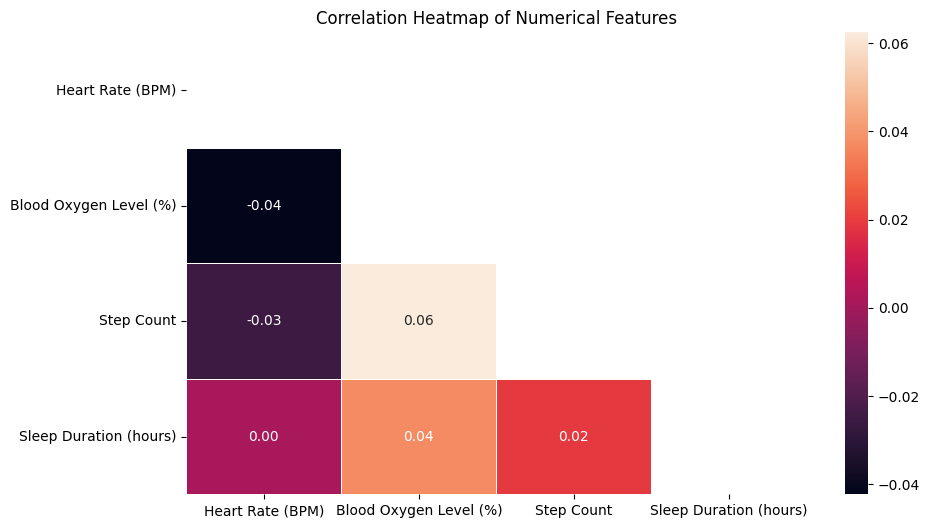

In [255]:
import numpy as np

plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(df.select_dtypes(include=['number']).corr(), dtype=bool))  # Hide upper triangle
sns.heatmap(df.select_dtypes(include=['number']).corr(), mask=mask, annot=True, fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


grouped comparison

<ipython-input-256-cc66def20d50>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Activity Level", y="Heart Rate (BPM)", hue="Stress Level", ci=None, palette="viridis")


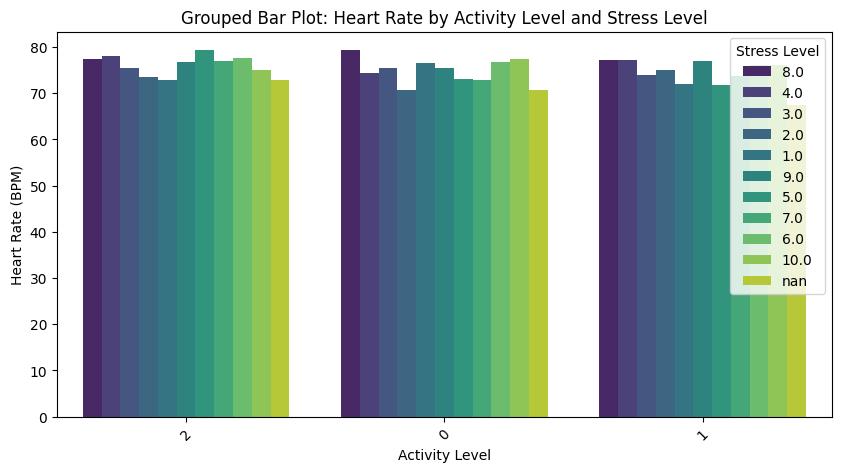

In [256]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Activity Level", y="Heart Rate (BPM)", hue="Stress Level", ci=None, palette="viridis")
plt.title("Grouped Bar Plot: Heart Rate by Activity Level and Stress Level")
plt.xticks(rotation=45)
plt.show()
